# Visualize the Representations
Visualize the representations learned in [`0_functional-group-representations`](./0_functional-group-representations.ipynb).

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import colors
prop_cycle = plt.rcParams['axes.prop_cycle']
import pandas as pd
import numpy as np
import os

Load the representations

In [2]:
groups = pd.read_pickle('groups_with_reps.pkl.gz')

## Plot the Learned Representations for C atoms
Color by functional group

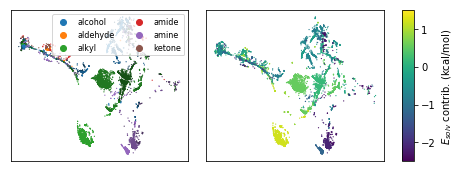

In [3]:
fig, axs = plt.subplots(1, 3, figsize=(6.5, 2.5), gridspec_kw={'width_ratios': [1, 1, 0.07]})

r = 'reps'
# Colored by functional groups
ax = axs[0]
for (gid, group), color in zip(groups.query('name!=None and type=="C"').groupby('name'), prop_cycle.by_key()["color"]):
    c = np.array(np.multiply((np.repeat((4 - group['degree'] + 1) / 4, group['count']))[:, None], [colors.to_rgb(color)]), dtype=float)
    X = np.concatenate(group[f'tsne_{r}'])
    ax.scatter(X[:, 0], X[:, 1], c=c, s=1.5, edgecolor='none', vmin=-2.5, vmax=1.5)
    ax.scatter([], [], label=gid)
axs[0].legend(ncol=2, fontsize=8)

# Colored by the group contribution model
ax = axs[1]
for gid, group in groups.query('type=="C"').groupby('smarts'):
    c = np.repeat(group['coef'], group['count'])
    X = np.concatenate(group[f'tsne_{r}'])
    c = ax.scatter(X[:, 0], X[:, 1], 
                  c=c, s=1.5, edgecolor='none', vmin=-2.5, vmax=1.5, zorder=-float(group['coef']))
c = ax.scatter([], [], c=[], vmin=-2.5, vmax=1.5)
fig.colorbar(c, label='$E_{solv}$ contrib. (kcal/mol)', cax=axs[2])


for ax in axs[:2]:
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()
fig.savefig(os.path.join('figures', 'atom-2d-rep-paper-figure.png'), dpi=320)